In [1]:
# Load the packages
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import sys
import csv
import math
import keras
import argparse
import scipy.io
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/affine/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.regularizers import L1L2
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD

In [3]:
#Load dataset
master_data= pd.read_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/tgs-data-science-master-c3f8b3a2900f40ddde655f8ef5f17d00cfaa7033/data/Master_dataset_v1.csv')

/home/affine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,20,23,25,34,48,65,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Columns in dataset
master_data.columns

Index(['Unnamed: 0', 'WellId', 'LeaseId', 'GroupId', 'API', 'FieldName_x',
       'Well Name and Number', 'WellNumber_x', 'OperatorName_x', 'StateName_x',
       'County_x', 'ProductionMonthYear', 'DaysOnProduction', 'Gas', 'Oil',
       'Water', 'ProductionType', 'ProductionTypeName', 'WellsReported',
       'AllocationMethod', 'DisplayFormation_x', 'StateLeaseId', 'WellName',
       'WellNumber_y', 'BasinName', 'DisplayFormation_y', 'Township',
       'TownshipDirection', 'Range', 'RangeDirection', 'Section', 'District',
       'Abstract', 'Survey', 'Block', 'Offshore', 'Area', 'OffshoreBlock',
       'QuarterQuarter', 'FootageNS', 'DirectionNS', 'FootageEW',
       'DirectionEW', 'SurfaceLatitude', 'SurfaceLongitude', 'BottomLatitude',
       'BottomLongitude', 'SpudDate', 'PlugDate', 'CompletionDate',
       'FirstProductionDate', 'FirstMonth', 'HasProduction', 'WellType',
       'TotalVerticalDepth', 'MeasuredDepth', 'ElevationGround',
       'ElevationKellyBushing', 'ElevationWat

In [5]:
#selecting Operator 'Occidental W TX OVERTHRUST INC.'
master_data1=master_data[master_data.OperatorName_x=="OCCIDENTAL W TX OVERTHRUST INC."]
#master_data1.head()

In [6]:
#select required API
master_data1=master_data1[master_data1.API==42371383610000]#42371380040000]#42371381890000]#42371381890000]#42371378930000]
labels=['Oil','ProductionMonthYear1','YearMonth']
master_data1=master_data1[labels]

#Sort data based on YearMonth
master_data1=master_data1.sort_values(by=['YearMonth'])#, ascending=[1, 1],axis=1)
#master_data1.tail()

In [7]:
master_data2=master_data1
master_data2=pd.DataFrame(master_data2)
# master_data2['start_date']=datetime.strptime(master_data1['ProductionMonthYear1'].iloc[0], "%Y-%m-%d")
# print(type(pd.DataFrame(master_data2['start_date']).iloc[0,0]))
# print(type(pd.DataFrame(master_data2['ProductionMonthYear1']).iloc[0,0]))

In [8]:
# master_data2['ProductionMonthYear1']=master_data2['ProductionMonthYear1'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# master_data2['days_age']=master_data2['ProductionMonthYear1'].sub(master_data2['start_date'])
# master_data2['days_age']=master_data2['days_age']/np.timedelta64(1,'D')

In [34]:
#Set YearMonth as Index for production
master_data2=master_data2[['YearMonth','Oil']]#,'days_age']]
master_data2=master_data2.iloc[:-1,:]# removing 201708 & 201709 values as they were zeros
master_data2.set_index('YearMonth')

,Oil
YearMonth,
200810,0.0
200811,0.0
200812,659.0
200901,412.0
200902,215.0
200903,220.0
200904,135.0
200905,99.0
200906,112.0


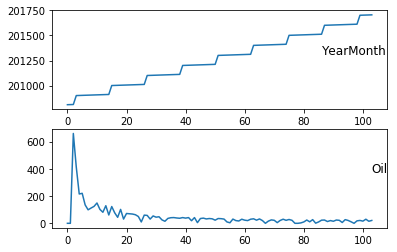

In [35]:
from matplotlib import pyplot
# load dataset
dataset = master_data2
values = dataset.values

# specify columns to plot
groups = [0,1]#,2]#3,4]#,5,6,7,8,9,10]
i = 0
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i+1)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [36]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [37]:
#Define lag(time steps for training) and n_seq(number of time steps to be predicted in future)
n_seq = 12
n_feature=1
n_lag= 24


In [38]:
# load dataset
dataset = master_data2.iloc[:,1:]
values = dataset.values
print(values.shape)
# ensure all data is float
values = values.astype('float32')
#print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_seq)

# drop columns we don't want to predict
# reframed.drop(reframed.iloc[:,25:], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)

(104, 1)
    var1(t-24)  var1(t-23)  var1(t-22)  var1(t-21)  var1(t-20)  var1(t-19)  \
24    0.000000    0.000000    1.000000    0.625190    0.326252    0.333839   
25    0.000000    1.000000    0.625190    0.326252    0.333839    0.204856   
26    1.000000    0.625190    0.326252    0.333839    0.204856    0.150228   
27    0.625190    0.326252    0.333839    0.204856    0.150228    0.169954   
28    0.326252    0.333839    0.204856    0.150228    0.169954    0.188164   

    var1(t-18)  var1(t-17)  var1(t-16)  var1(t-15)     ...      var1(t+2)  \
24    0.204856    0.150228    0.169954    0.188164     ...       0.091047   
25    0.150228    0.169954    0.188164    0.226100     ...       0.088012   
26    0.169954    0.188164    0.226100    0.154780     ...       0.047041   
27    0.188164    0.226100    0.154780    0.122914     ...       0.081942   
28    0.226100    0.154780    0.122914    0.195751     ...       0.068285   

    var1(t+3)  var1(t+4)  var1(t+5)  var1(t+6)  var1(t+7)  

In [39]:
# split into train and test sets
values = reframed.values
train = values[:-1, :]
test = values[-1:, :]

# split into input and outputs
train_X, train_y = train[:, :-(n_seq)], train[:, -(n_seq):]
test_X, test_y = test[:, :-n_seq], test[:, -n_seq:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_feature))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_feature))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(68, 24, 1) (68, 12) (1, 24, 1) (1, 12)


In [40]:
#Hyperparameters
h1=n_lag*2
h2=n_lag*2
h3=n_seq
h4=n_seq
drop1=0.4
drop2=0.3
drop3=0.0 
drop4=0.0
n_y=n_seq
epoch=1000
batch_size=16
lr=0.0003
L1=0.00
L2=0.01

In [41]:
# model.add(LSTM(h1, batch_input_shape=(batch_size,train_X.shape[1],train_X.shape[2]), stateful=True))#,return_sequences=True, recurrent_regularizer=reg))

In [42]:
# design network
model = Sequential()
reg = L1L2(l1=L1, l2=L2)
model.add(LSTM(h1, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True, recurrent_regularizer=reg))
model.add(Dropout(drop1, seed = 1))
model.add(LSTM(h2,return_sequences=True))
model.add(Dropout(drop2, seed = 1))
model.add(LSTM(h3,return_sequences=True))
model.add(Dropout(drop3, seed = 1))
model.add(LSTM(h4,return_sequences=False))
model.add(Dropout(drop4, seed = 1))
model.add(Dense(n_seq, activation='relu'))
model.add(Dense(n_y, activation='relu'))
adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mae', optimizer= adam)



In [43]:
# model=load_model('LSTM_12_month.h5')
# weights=model.get_weights()
# print(weights)
# model.save_weights('weights.hdf5')
# model.set_weights(weights)
# model.load_weights('weights.hdf5')
# model.load_weights('weights_42371381890000.hdf5')

Train on 68 samples, validate on 1 samples
Epoch 1/1000
 - 2s - loss: 0.5087 - val_loss: 0.4845
Epoch 2/1000
 - 0s - loss: 0.4888 - val_loss: 0.4652
Epoch 3/1000
 - 0s - loss: 0.4713 - val_loss: 0.4486
Epoch 4/1000
 - 0s - loss: 0.4553 - val_loss: 0.4335
Epoch 5/1000
 - 0s - loss: 0.4397 - val_loss: 0.4187
Epoch 6/1000
 - 0s - loss: 0.4251 - val_loss: 0.4045
Epoch 7/1000
 - 0s - loss: 0.4114 - val_loss: 0.3912
Epoch 8/1000
 - 0s - loss: 0.3981 - val_loss: 0.3784
Epoch 9/1000
 - 0s - loss: 0.3852 - val_loss: 0.3661
Epoch 10/1000
 - 0s - loss: 0.3729 - val_loss: 0.3538
Epoch 11/1000
 - 0s - loss: 0.3608 - val_loss: 0.3416
Epoch 12/1000
 - 0s - loss: 0.3491 - val_loss: 0.3300
Epoch 13/1000
 - 0s - loss: 0.3379 - val_loss: 0.3189
Epoch 14/1000
 - 0s - loss: 0.3273 - val_loss: 0.3084
Epoch 15/1000
 - 0s - loss: 0.3170 - val_loss: 0.2987
Epoch 16/1000
 - 0s - loss: 0.3071 - val_loss: 0.2897
Epoch 17/1000
 - 0s - loss: 0.2974 - val_loss: 0.2808
Epoch 18/1000
 - 0s - loss: 0.2883 - val_loss: 0

 - 0s - loss: 0.0181 - val_loss: 0.0182
Epoch 152/1000
 - 0s - loss: 0.0180 - val_loss: 0.0177
Epoch 153/1000
 - 0s - loss: 0.0179 - val_loss: 0.0179
Epoch 154/1000
 - 0s - loss: 0.0178 - val_loss: 0.0179
Epoch 155/1000
 - 0s - loss: 0.0177 - val_loss: 0.0174
Epoch 156/1000
 - 0s - loss: 0.0176 - val_loss: 0.0174
Epoch 157/1000
 - 0s - loss: 0.0175 - val_loss: 0.0178
Epoch 158/1000
 - 0s - loss: 0.0174 - val_loss: 0.0172
Epoch 159/1000
 - 0s - loss: 0.0172 - val_loss: 0.0171
Epoch 160/1000
 - 0s - loss: 0.0171 - val_loss: 0.0171
Epoch 161/1000
 - 0s - loss: 0.0171 - val_loss: 0.0169
Epoch 162/1000
 - 0s - loss: 0.0169 - val_loss: 0.0175
Epoch 163/1000
 - 0s - loss: 0.0169 - val_loss: 0.0169
Epoch 164/1000
 - 0s - loss: 0.0169 - val_loss: 0.0168
Epoch 165/1000
 - 0s - loss: 0.0166 - val_loss: 0.0174
Epoch 166/1000
 - 0s - loss: 0.0166 - val_loss: 0.0165
Epoch 167/1000
 - 0s - loss: 0.0166 - val_loss: 0.0163
Epoch 168/1000
 - 0s - loss: 0.0165 - val_loss: 0.0173
Epoch 169/1000
 - 0s - lo

 - 0s - loss: 0.0139 - val_loss: 0.0140
Epoch 301/1000
 - 0s - loss: 0.0139 - val_loss: 0.0142
Epoch 302/1000
 - 0s - loss: 0.0138 - val_loss: 0.0140
Epoch 303/1000
 - 0s - loss: 0.0138 - val_loss: 0.0142
Epoch 304/1000
 - 0s - loss: 0.0139 - val_loss: 0.0140
Epoch 305/1000
 - 0s - loss: 0.0138 - val_loss: 0.0141
Epoch 306/1000
 - 0s - loss: 0.0138 - val_loss: 0.0140
Epoch 307/1000
 - 0s - loss: 0.0138 - val_loss: 0.0142
Epoch 308/1000
 - 0s - loss: 0.0138 - val_loss: 0.0138
Epoch 309/1000
 - 0s - loss: 0.0137 - val_loss: 0.0142
Epoch 310/1000
 - 0s - loss: 0.0138 - val_loss: 0.0140
Epoch 311/1000
 - 0s - loss: 0.0138 - val_loss: 0.0137
Epoch 312/1000
 - 0s - loss: 0.0138 - val_loss: 0.0142
Epoch 313/1000
 - 0s - loss: 0.0139 - val_loss: 0.0136
Epoch 314/1000
 - 0s - loss: 0.0138 - val_loss: 0.0133
Epoch 315/1000
 - 0s - loss: 0.0137 - val_loss: 0.0131
Epoch 316/1000
 - 0s - loss: 0.0137 - val_loss: 0.0132
Epoch 317/1000
 - 0s - loss: 0.0138 - val_loss: 0.0133
Epoch 318/1000
 - 0s - lo

 - 0s - loss: 0.0134 - val_loss: 0.0128
Epoch 450/1000
 - 0s - loss: 0.0134 - val_loss: 0.0123
Epoch 451/1000
 - 0s - loss: 0.0134 - val_loss: 0.0125
Epoch 452/1000
 - 0s - loss: 0.0134 - val_loss: 0.0125
Epoch 453/1000
 - 0s - loss: 0.0134 - val_loss: 0.0126
Epoch 454/1000
 - 0s - loss: 0.0135 - val_loss: 0.0126
Epoch 455/1000
 - 0s - loss: 0.0134 - val_loss: 0.0126
Epoch 456/1000
 - 0s - loss: 0.0134 - val_loss: 0.0126
Epoch 457/1000
 - 0s - loss: 0.0134 - val_loss: 0.0127
Epoch 458/1000
 - 0s - loss: 0.0134 - val_loss: 0.0125
Epoch 459/1000
 - 0s - loss: 0.0134 - val_loss: 0.0124
Epoch 460/1000
 - 0s - loss: 0.0134 - val_loss: 0.0126
Epoch 461/1000
 - 0s - loss: 0.0134 - val_loss: 0.0124
Epoch 462/1000
 - 0s - loss: 0.0134 - val_loss: 0.0125
Epoch 463/1000
 - 0s - loss: 0.0134 - val_loss: 0.0126
Epoch 464/1000
 - 0s - loss: 0.0135 - val_loss: 0.0126
Epoch 465/1000
 - 0s - loss: 0.0135 - val_loss: 0.0126
Epoch 466/1000
 - 0s - loss: 0.0135 - val_loss: 0.0124
Epoch 467/1000
 - 0s - lo

 - 0s - loss: 0.0134 - val_loss: 0.0130
Epoch 599/1000
 - 0s - loss: 0.0134 - val_loss: 0.0132
Epoch 600/1000
 - 0s - loss: 0.0134 - val_loss: 0.0132
Epoch 601/1000
 - 0s - loss: 0.0135 - val_loss: 0.0129
Epoch 602/1000
 - 0s - loss: 0.0134 - val_loss: 0.0132
Epoch 603/1000
 - 0s - loss: 0.0134 - val_loss: 0.0129
Epoch 604/1000
 - 0s - loss: 0.0135 - val_loss: 0.0128
Epoch 605/1000
 - 0s - loss: 0.0134 - val_loss: 0.0133
Epoch 606/1000
 - 0s - loss: 0.0135 - val_loss: 0.0130
Epoch 607/1000
 - 0s - loss: 0.0134 - val_loss: 0.0131
Epoch 608/1000
 - 0s - loss: 0.0134 - val_loss: 0.0134
Epoch 609/1000
 - 0s - loss: 0.0134 - val_loss: 0.0127
Epoch 610/1000
 - 0s - loss: 0.0134 - val_loss: 0.0133
Epoch 611/1000
 - 0s - loss: 0.0133 - val_loss: 0.0130
Epoch 612/1000
 - 0s - loss: 0.0133 - val_loss: 0.0131
Epoch 613/1000
 - 0s - loss: 0.0133 - val_loss: 0.0130
Epoch 614/1000
 - 0s - loss: 0.0134 - val_loss: 0.0129
Epoch 615/1000
 - 0s - loss: 0.0133 - val_loss: 0.0133
Epoch 616/1000
 - 0s - lo

 - 0s - loss: 0.0134 - val_loss: 0.0133
Epoch 748/1000
 - 0s - loss: 0.0133 - val_loss: 0.0132
Epoch 749/1000
 - 0s - loss: 0.0133 - val_loss: 0.0130
Epoch 750/1000
 - 0s - loss: 0.0133 - val_loss: 0.0135
Epoch 751/1000
 - 0s - loss: 0.0133 - val_loss: 0.0131
Epoch 752/1000
 - 0s - loss: 0.0133 - val_loss: 0.0132
Epoch 753/1000
 - 0s - loss: 0.0133 - val_loss: 0.0134
Epoch 754/1000
 - 0s - loss: 0.0132 - val_loss: 0.0133
Epoch 755/1000
 - 0s - loss: 0.0132 - val_loss: 0.0135
Epoch 756/1000
 - 0s - loss: 0.0133 - val_loss: 0.0127
Epoch 757/1000
 - 0s - loss: 0.0135 - val_loss: 0.0129
Epoch 758/1000
 - 0s - loss: 0.0134 - val_loss: 0.0135
Epoch 759/1000
 - 0s - loss: 0.0134 - val_loss: 0.0128
Epoch 760/1000
 - 0s - loss: 0.0136 - val_loss: 0.0128
Epoch 761/1000
 - 0s - loss: 0.0133 - val_loss: 0.0134
Epoch 762/1000
 - 0s - loss: 0.0134 - val_loss: 0.0134
Epoch 763/1000
 - 0s - loss: 0.0133 - val_loss: 0.0131
Epoch 764/1000
 - 0s - loss: 0.0133 - val_loss: 0.0132
Epoch 765/1000
 - 0s - lo

 - 0s - loss: 0.0133 - val_loss: 0.0127
Epoch 897/1000
 - 0s - loss: 0.0133 - val_loss: 0.0132
Epoch 898/1000
 - 0s - loss: 0.0133 - val_loss: 0.0134
Epoch 899/1000
 - 0s - loss: 0.0133 - val_loss: 0.0129
Epoch 900/1000
 - 0s - loss: 0.0133 - val_loss: 0.0132
Epoch 901/1000
 - 0s - loss: 0.0133 - val_loss: 0.0131
Epoch 902/1000
 - 0s - loss: 0.0133 - val_loss: 0.0126
Epoch 903/1000
 - 0s - loss: 0.0132 - val_loss: 0.0134
Epoch 904/1000
 - 0s - loss: 0.0133 - val_loss: 0.0131
Epoch 905/1000
 - 0s - loss: 0.0132 - val_loss: 0.0133
Epoch 906/1000
 - 0s - loss: 0.0132 - val_loss: 0.0133
Epoch 907/1000
 - 0s - loss: 0.0133 - val_loss: 0.0132
Epoch 908/1000
 - 0s - loss: 0.0133 - val_loss: 0.0134
Epoch 909/1000
 - 0s - loss: 0.0133 - val_loss: 0.0127
Epoch 910/1000
 - 0s - loss: 0.0132 - val_loss: 0.0137
Epoch 911/1000
 - 0s - loss: 0.0133 - val_loss: 0.0132
Epoch 912/1000
 - 0s - loss: 0.0134 - val_loss: 0.0125
Epoch 913/1000
 - 0s - loss: 0.0133 - val_loss: 0.0131
Epoch 914/1000
 - 0s - lo

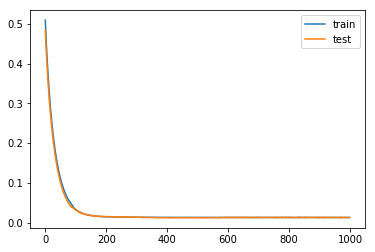

In [44]:
# fit network
history = model.fit(train_X, train_y, epochs = epoch, batch_size = batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# model.save('LSTM_12_month_42371381890000.h5')
# del model

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [45]:
#SAVE THE MODEL

model.save('LSTM_12_month_42371383610000_v2.h5')
# model=load_model('LSTM_12_month_42371383610000.h5')
# weights=model.get_weights()
# print(weights)
model.save_weights('weights_42371383610000_v2.hdf5')
# model.set_weights(weights)
# weights=model.load_weights('weights_42371383610000.hdf5')
# model.set_weights(weights)

In [46]:
#Predict the model on test
yhat = model.predict(test_X)
# print(yhat.shape)
# print(test_y.shape)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# print(inv_yhat.shape)
inv_yhat = inv_yhat[:,:]

# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,:]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE = mean_absolute_error(inv_y, inv_yhat)
print("MAE = "+str(MAE))

Test RMSE: 10.370
MAE = 8.78704


In [47]:
# make a prediction on train
yhat_train = model.predict(train_X)

# invert scaling for train forecast
inv_yhat_train = scaler.inverse_transform(yhat_train)

# invert scaling for actual train
inv_y_train = scaler.inverse_transform(train_y)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Train RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE_train = mean_absolute_error(inv_y_train, inv_yhat_train)
print("MAE Train = "+str(MAE_train))

Train RMSE: 12.445
MAE Train = 8.68287


In [48]:
# Calculate Mape
# Note LSTM always gives 1 step shifted reponse

#test Mape
Mape_test1=[]
for i in range(n_seq-1):
    mape1=(np.abs(inv_y[:,i]-inv_yhat[:,i+1])/(inv_y[:,i]+1))
    Mape_test1.append(mape1)
#print(Mape_test1)
Mape_test=np.mean(Mape_test1)

#Mape_test=np.mean(np.abs(inv_y[i]-inv_yhat[i+1])/(inv_y[i]+1))
#Mape_train=np.mean(np.abs(inv_y_train[i]-inv_yhat_train[i+1])/(inv_y_train[i]+1))
Mape_train=np.mean(np.abs(inv_y_train-inv_yhat_train)/(inv_y_train+1))

print("MAPE Train = "+str(Mape_train))
print("MAPE Test = "+str(Mape_test))

MAPE Train = 1.51889
MAPE Test = 1.50857


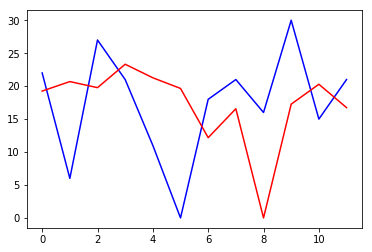

In [49]:
df1=pd.DataFrame(inv_y)
df2=pd.DataFrame(inv_yhat)
value1=df1.values
value2=df2.values
value1=value1.reshape(n_seq,1)
value2=value2.reshape(n_seq,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

In [50]:
# df1=pd.DataFrame(inv_y_train[0,:])
# df2=pd.DataFrame(inv_yhat_train[0,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[20,:])
# df2=pd.DataFrame(inv_yhat_train[20,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[40,:])
# df2=pd.DataFrame(inv_yhat_train[40,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

In [51]:
for i in range(len(inv_y)):
    for j in range(len(inv_y[i])):
        print(str(inv_y[i][j])+", "+str(inv_yhat[i][j]))

22.0, 19.2523
6.0, 20.692
27.0, 19.7685
21.0, 23.3217
11.0, 21.2684
0.0, 19.65
18.0, 12.1798
21.0, 16.5694
16.0, 0.0
30.0, 17.2625
15.0, 20.286
21.0, 16.7411


In [52]:
# get test results in CSV
df1=pd.DataFrame(inv_y[:,:-1])
df1=pd.DataFrame.transpose(df1)
df2=pd.DataFrame(inv_yhat[:,1:])
df2=pd.DataFrame.transpose(df2)
df3=pd.DataFrame(np.array(master_data2.iloc[-n_seq:-1,:]))
df3.columns=['YearMonth','Oil']
df4=pd.concat([df3,df1,df2],axis=1)
df4.columns=['YearMonth','Oil','Oil_Actual','Oil_Predicted']
print(df4)

    YearMonth   Oil  Oil_Actual  Oil_Predicted
0    201606.0  22.0        22.0      20.692011
1    201607.0   6.0         6.0      19.768496
2    201608.0  27.0        27.0      23.321663
3    201609.0  21.0        21.0      21.268402
4    201610.0  11.0        11.0      19.650007
5    201611.0   0.0         0.0      12.179789
6    201612.0  18.0        18.0      16.569386
7    201701.0  21.0        21.0       0.000000
8    201702.0  16.0        16.0      17.262547
9    201703.0  30.0        30.0      20.285963
10   201704.0  15.0        15.0      16.741087


In [25]:
df4.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371383610000_prediction.csv')

In [27]:
df1=pd.DataFrame(inv_y_train)
df11=df1.iloc[:,0]

df2=pd.DataFrame(inv_yhat_train)
df12=df2.iloc[:,0]

df3=pd.DataFrame(np.array(master_data2.iloc[24:-n_seq,:]))
print(df3.shape)
df3.columns=['YearMonth','Oil']

df_train=pd.concat([df3,df11,df12], axis=1)
df_train1=pd.DataFrame(np.array(df_train))
df_train1.columns=["Year-Month","Oil","Actual_Oil","Predicted_Oil"]
df_train1

(71, 2)


,Year-Month,Oil,Actual_Oil,Predicted_Oil
0,201010.0,50.0,50.000000,50.213772
1,201011.0,10.0,10.000000,48.485497
2,201012.0,60.0,60.000000,46.778873
3,201101.0,58.0,58.000000,46.249847
4,201102.0,31.0,30.999998,45.558784
5,201103.0,54.0,54.000000,44.792404
6,201104.0,45.0,45.000000,44.010948
7,201105.0,48.0,48.000004,43.350960
8,201106.0,25.0,25.000000,42.770569
9,201107.0,15.0,15.000000,42.162395


In [28]:
df_train1.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371383610000_train_prediction.csv')